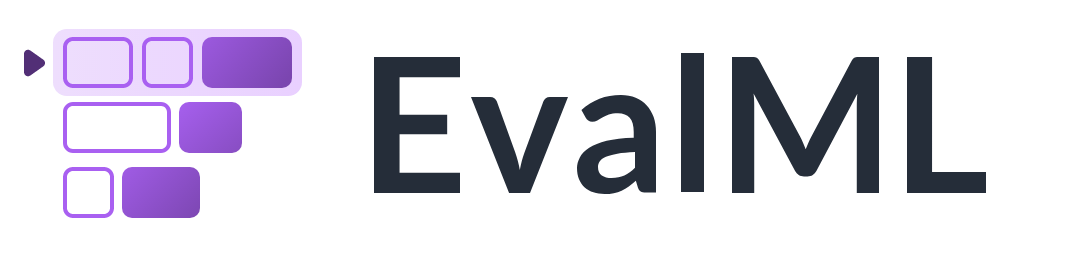
#### This notebook is TPS-May prediction notebook using Evalml package.
#### Evalml is kind of AutoML package.

### 1. Installation EvalML

In [ ]:
!pip install evalml

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings(action='ignore')

# import evalml
# from evalml import AutoMLSearch

### 2.Read data and normalization

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
X = train.iloc[:, 1:-1]
y = train.iloc[:, -1]

In [ ]:
mc = MinMaxScaler()
mc.fit(X)
X = mc.transform(X)

### 3.AutoML (Used package : Evalml)

In [ ]:
# X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='multiclass', test_size=.4)

automl = AutoMLSearch(X_train=X, y_train=y, problem_type="multiclass", objective="log loss multiclass", ensembling=True)
automl.search()

best_pipeline = automl.best_pipeline

# best_pipeline.score(X_test, y_test, objectives = ['log loss multiclass'])

#### Best pipeline 'log loss multiclass' : 1.132344

### 4.Prediction

In [ ]:
test = pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
test_set = test.iloc[:, 1:]
test_set = mc.transform(test_set)
pred = best_pipeline.predict_proba(test_set)

In [ ]:
pred = pred.df
pred.index = test.iloc[:,0]

In [ ]:
pred.to_csv('./submission.csv')

### 5. Etc (TPOT)

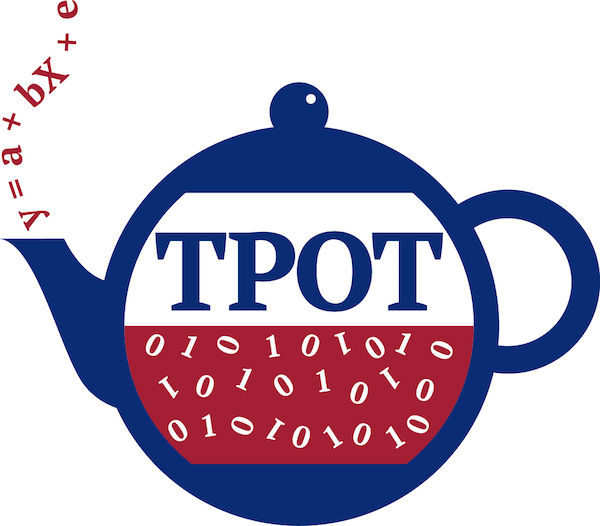

In [ ]:
import tpot

In [ ]:
pipeline_optimizer = tpot.TPOTClassifier(generations=5,population_size=20,cv=5)

In [ ]:
pipeline_optimizer.fit(X, y) #fit the pipeline optimizer - can take a long time
pipeline_optimizer.export('tpot_exported_pipeline.py') #export the pipeline - in Python code!